# Housing Price Prediction Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## EDA

In [2]:
df = pd.read_csv('./kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Distribution of the labels and some features

C:\Users\Advait_PC\anaconda3\envs\tfDeepLearningEnv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

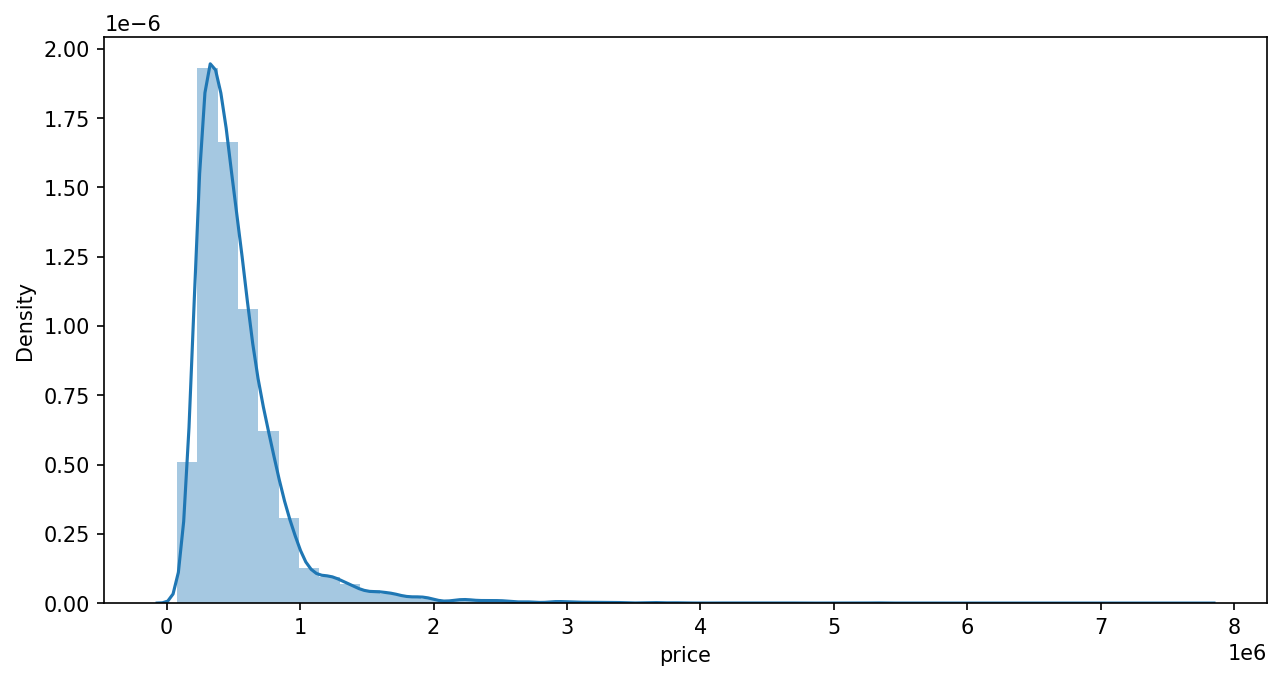

In [6]:
plt.figure(figsize=(10,5),dpi=150)
sns.distplot(df['price'])

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

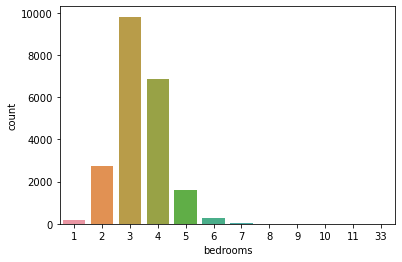

In [7]:
sns.countplot(data = df, x = 'bedrooms')

### Some plots of price vs some highly correlated features

In [8]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

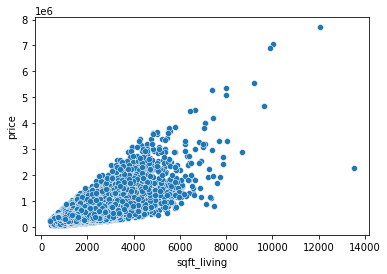

In [9]:
sns.scatterplot(x='sqft_living',y='price',data=df)

<AxesSubplot:xlabel='grade', ylabel='price'>

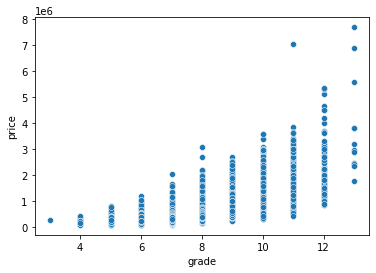

In [10]:
sns.scatterplot(x='grade',y='price',data = df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

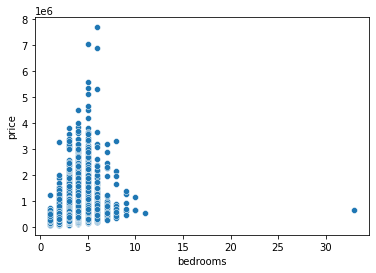

In [11]:
sns.scatterplot(x='bedrooms',y='price',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

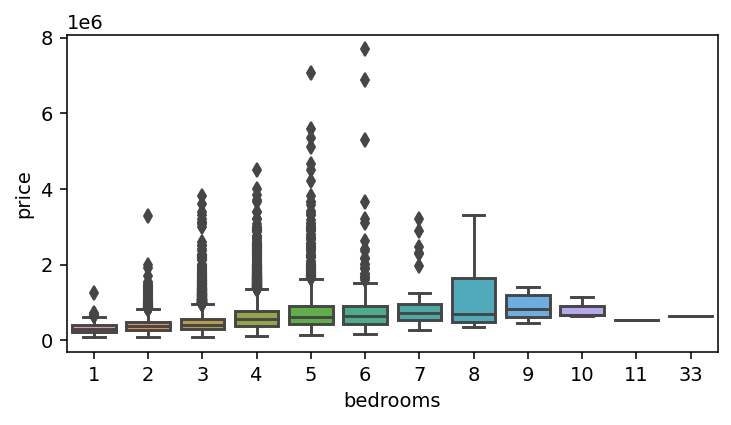

In [12]:
plt.figure(figsize=(6,3),dpi=140)
sns.boxplot(x='bedrooms',y='price',data=df)

In [13]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Distribution of price with longitude and latitude

<AxesSubplot:xlabel='long', ylabel='price'>

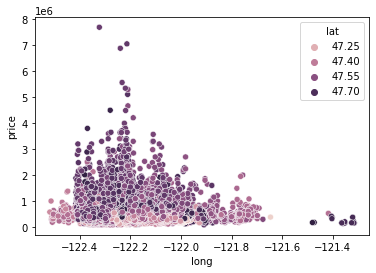

In [14]:
sns.scatterplot(y='price',x='long',data=df,hue='lat')

<AxesSubplot:xlabel='lat', ylabel='price'>

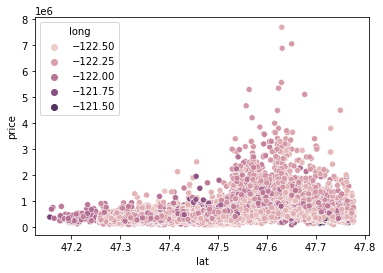

In [15]:
sns.scatterplot(y='price',x='lat',data=df,hue='long')

## Plot of locations of the houses with hue as price

<AxesSubplot:xlabel='long', ylabel='lat'>

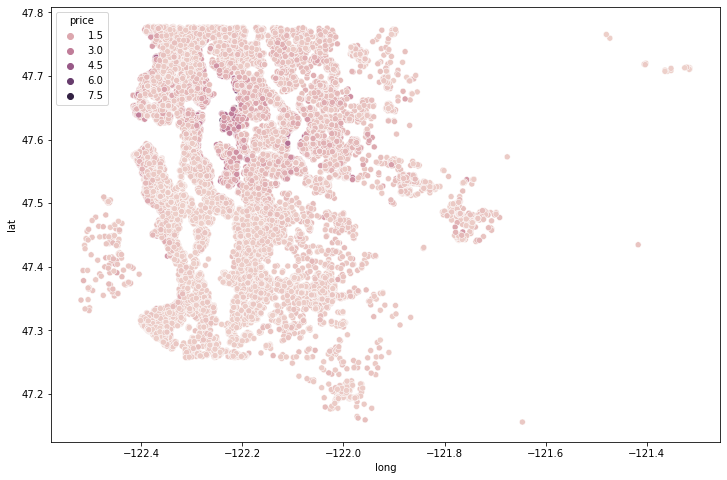

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'long', y ='lat', data = df, hue='price')

In [19]:
df.sort_values('price',ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


In [21]:
len(df)*0.01

215.97

### After removing the expensive outliers

In [22]:
non_top_1_percent = df.sort_values('price',ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

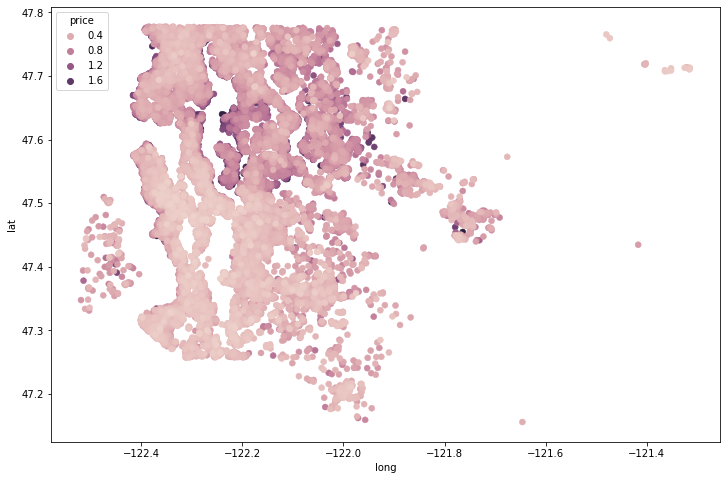

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'long', y ='lat', data = non_top_1_percent, hue='price',edgecolor=None)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

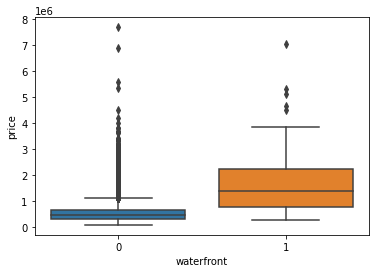

In [26]:
sns.boxplot(x='waterfront',y='price',data=df)

### Basic observations from the location scatter and boxplot :
Property on the waterfront is more expensive than inland property.

## Feature Engineering

In [27]:
df = df.drop('id',axis=1)

In [29]:
df['date'] = pd.to_datetime(df['date'])

In [30]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [31]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [32]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


### Trends of price with month / year

<AxesSubplot:xlabel='month', ylabel='price'>

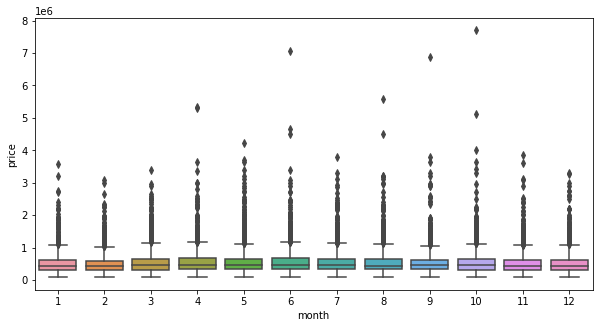

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(x='month',y='price',data=df)

<AxesSubplot:xlabel='month'>

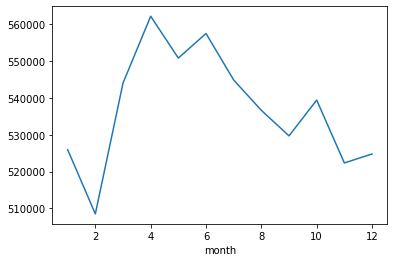

In [38]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

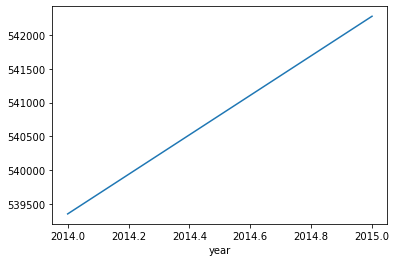

In [39]:
df.groupby('year').mean()['price'].plot()

### observations
###### There is very small variations in mean price across all months.
###### Price rises from 2014 to 2015.

In [40]:
df = df.drop('date',axis=1)

In [46]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

### zipcodes:
Too many zipcode categories to make dummy columns. So, just drop zipcodes.

In [47]:
df = df.drop('zipcode',axis=1)

In [49]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [52]:
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

## Data Preprocessing and Creating a Model

In [53]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [60]:
X_train.shape

(15117, 19)

In [61]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [62]:
model.fit(x = X_train, y = y_train,validation_data = (X_test, y_test), batch_size = 128, epochs = 400)

Epoch 1/400
119/119 [==============================] - 1s 11ms/step - loss: 430245281792.0000 - val_loss: 418949562368.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 429618298880.0000 - val_loss: 416693256192.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 419921035264.0000 - val_loss: 393779904512.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 367136145408.0000 - val_loss: 303230681088.0000
Epoch 5/400
119/119 [==============================] - 0s 4ms/step - loss: 238055604224.0000 - val_loss: 155388100608.0000
Epoch 6/400
119/119 [==============================] - 0s 4ms/step - loss: 121742467072.0000 - val_loss: 97492443136.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 99115761664.0000 - val_loss: 94770495488.0000
Epoch 8/400
119/119 [==============================] - 0s 4ms/step - loss: 97222688768.0000 - val_loss: 93373939712.0000
Epoch 9/400
119/119 

119/119 [==============================] - 0s 3ms/step - loss: 40555474944.0000 - val_loss: 39406981120.0000
Epoch 68/400
119/119 [==============================] - 0s 3ms/step - loss: 40291942400.0000 - val_loss: 39111237632.0000
Epoch 69/400
119/119 [==============================] - 1s 5ms/step - loss: 40030420992.0000 - val_loss: 38953582592.0000
Epoch 70/400
119/119 [==============================] - 1s 6ms/step - loss: 39819530240.0000 - val_loss: 38691733504.0000
Epoch 71/400
119/119 [==============================] - 0s 4ms/step - loss: 39580246016.0000 - val_loss: 38387924992.0000
Epoch 72/400
119/119 [==============================] - 1s 4ms/step - loss: 39328940032.0000 - val_loss: 38281089024.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 39151050752.0000 - val_loss: 37981507584.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 38955642880.0000 - val_loss: 37745704960.0000
Epoch 75/400
119/119 [===============

Epoch 134/400
119/119 [==============================] - 0s 3ms/step - loss: 33467621376.0000 - val_loss: 32174462976.0000
Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 33442195456.0000 - val_loss: 32139831296.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 33404835840.0000 - val_loss: 32049498112.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 33337643008.0000 - val_loss: 31987478528.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 33330704384.0000 - val_loss: 31967717376.0000
Epoch 139/400
119/119 [==============================] - 0s 4ms/step - loss: 33307410432.0000 - val_loss: 31901868032.0000
Epoch 140/400
119/119 [==============================] - 0s 3ms/step - loss: 33218562048.0000 - val_loss: 31859847168.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 33218527232.0000 - val_loss: 31857231872.0000
Epoch 142/400
11

119/119 [==============================] - 0s 2ms/step - loss: 31792607232.0000 - val_loss: 30457231360.0000
Epoch 201/400
119/119 [==============================] - 0s 2ms/step - loss: 31791538176.0000 - val_loss: 30196590592.0000
Epoch 202/400
119/119 [==============================] - 0s 2ms/step - loss: 31745191936.0000 - val_loss: 30242371584.0000
Epoch 203/400
119/119 [==============================] - 0s 2ms/step - loss: 31758233600.0000 - val_loss: 30126751744.0000
Epoch 204/400
119/119 [==============================] - 0s 2ms/step - loss: 31738134528.0000 - val_loss: 30111729664.0000
Epoch 205/400
119/119 [==============================] - 0s 2ms/step - loss: 31716038656.0000 - val_loss: 30106892288.0000
Epoch 206/400
119/119 [==============================] - 0s 2ms/step - loss: 31711629312.0000 - val_loss: 30059485184.0000
Epoch 207/400
119/119 [==============================] - 0s 2ms/step - loss: 31696191488.0000 - val_loss: 30077452288.0000
Epoch 208/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30910711808.0000 - val_loss: 29040506880.0000
Epoch 267/400
119/119 [==============================] - 0s 2ms/step - loss: 30881337344.0000 - val_loss: 29085763584.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 30903396352.0000 - val_loss: 29182730240.0000
Epoch 269/400
119/119 [==============================] - 0s 3ms/step - loss: 30882332672.0000 - val_loss: 29047400448.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 30821715968.0000 - val_loss: 29056278528.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 30833108992.0000 - val_loss: 29004353536.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 30804951040.0000 - val_loss: 29066043392.0000
Epoch 273/400
119/119 [==============================] - 0s 2ms/step - loss: 30822111232.0000 - val_loss: 28988588032.0000
Epoch 274/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30219567104.0000 - val_loss: 28300378112.0000
Epoch 333/400
119/119 [==============================] - 0s 2ms/step - loss: 30246094848.0000 - val_loss: 28371826688.0000
Epoch 334/400
119/119 [==============================] - 0s 2ms/step - loss: 30193367040.0000 - val_loss: 28203685888.0000
Epoch 335/400
119/119 [==============================] - 0s 2ms/step - loss: 30219888640.0000 - val_loss: 28216768512.0000
Epoch 336/400
119/119 [==============================] - 0s 2ms/step - loss: 30180352000.0000 - val_loss: 28190582784.0000
Epoch 337/400
119/119 [==============================] - 0s 2ms/step - loss: 30191005696.0000 - val_loss: 28198250496.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 30159517696.0000 - val_loss: 28224088064.0000
Epoch 339/400
119/119 [==============================] - 0s 2ms/step - loss: 30173884416.0000 - val_loss: 28159598592.0000
Epoch 340/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 29632770048.0000 - val_loss: 27490627584.0000
Epoch 399/400
119/119 [==============================] - 0s 2ms/step - loss: 29615953920.0000 - val_loss: 27513509888.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 29594828800.0000 - val_loss: 27469928448.0000


## Model Evaluation and predictions